# Analyze the Data Term Matrix
This notebook uses the R Kernel. See `03_analyze_sections.ipynb` for further instructions concerning installing the R kernel and loading libraries.

In [1]:
.libPaths()

[1] "/Users/veldhuis/Library/R/3.2/library"                         
[2] "/Library/Frameworks/R.framework/Versions/3.2/Resources/library"

In [2]:
# adjust the variable `lib.dir` to make it equal to one of the library paths of your system
lib.dir = '/Library/Frameworks/R.framework/Versions/3.2/Resources/library'

In [3]:
library(ggplot2, lib.loc = lib.dir)
library(ggdendro, lib.loc = lib.dir)
library(reshape, lib.loc = lib.dir)
library(scales, lib.loc = lib.dir)

Warning message:
“package ‘ggplot2’ was built under R version 3.2.5”Warning message:
“package ‘ggdendro’ was built under R version 3.2.5”Warning message:
“package ‘reshape’ was built under R version 3.2.5”Warning message:
“package ‘scales’ was built under R version 3.2.5”

# Note to Erin
I have hard-coded the file `Q39_par_dtm.csv` here - should give the user a choice.

In [4]:
dtm_df = read.csv('../data/pass/Q39_par_dtm.csv', stringsAsFactors = F, row.names = 1) 

## Make sure the R correctly parsed the DTM  
- It looks like R doesn't allow variable names to start with a number, thus all entries starting with a number had "X" added to the beggining of the entry name.  
- R doesn't allow parentheses in variable names, so entries like "1(ban₂)[na]na" parsed as "X1.ban...na.na".   
- 



In [5]:
#Import dtm_df from Python

# Set cols and rows to sum to not include summary column and row added later
# This needs to be in separate cell from addition of summary col and row!
cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

head(dtm_df)
#str(dtm_df)

,X1.ban...na.na_1.diš..na.na_sila.unit.n_11.na.na,X1.ban...na.na_2.diš..na.na_sila.unit.n_12.na.na,X1.ban...na.na_3.diš..na.na_sila.unit.n_13.na.na,X1.ban...na.na_4.diš..na.na_sila.unit.n_14.na.na,X1.ban...na.na_5.diš..na.na_sila.unit.n_15.na.na,X1.ban...na.na_še.barley.n_10.na.na,X10.na.na_še.barley.n_kugbabbar.silver.n,X11.na.na_še.barley.n_kugbabbar.silver.n,X12.na.na_še.barley.n_kugbabbar.silver.n,X13.na.na_še.barley.n_kugbabbar.silver.n,⋯,šuʾa.stool.n_ašgab.leatherworker.n,šuʾa.stool.n_burgul.stone.cutter.n,šuʾa.stool.n_dus.bathroom.n,šuʾa.stool.n_kaskal.way.n,šuʾa.stool.n_nagar.carpenter.n,šuʾa.stool.n_niŋgula.greatness.n,šuʾa.stool.n_suhsah.sound.n,šuʾa.stool.n_tibira.sculptor.n,šuʾa.stool.n_x.na.na,šuʾura.goose.n
P117395,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P117404,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P128345,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224980,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224986,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224994,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Check density of DTM

Look at distribution of document lengths (number of entries per document).  
Look at distribution of entry frequency (number of documents each entry appears in).


   2    3    4    6    7    8    9   10   12   14   16   17   18   19   20   22 
   2   56    4    3    3    2    1    3    2    1    1    1    1    1    2    1 
  29   35   36   37   39   40   65   93  105  115  116  162  172  174  186  193 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 224  274  419  673  698  778 <NA> 
   1    1    1    1    1    1    1 

[1] "There are 35 documents with 10 or more entries."
[1] "There are 14 documents with 100 or more entries."


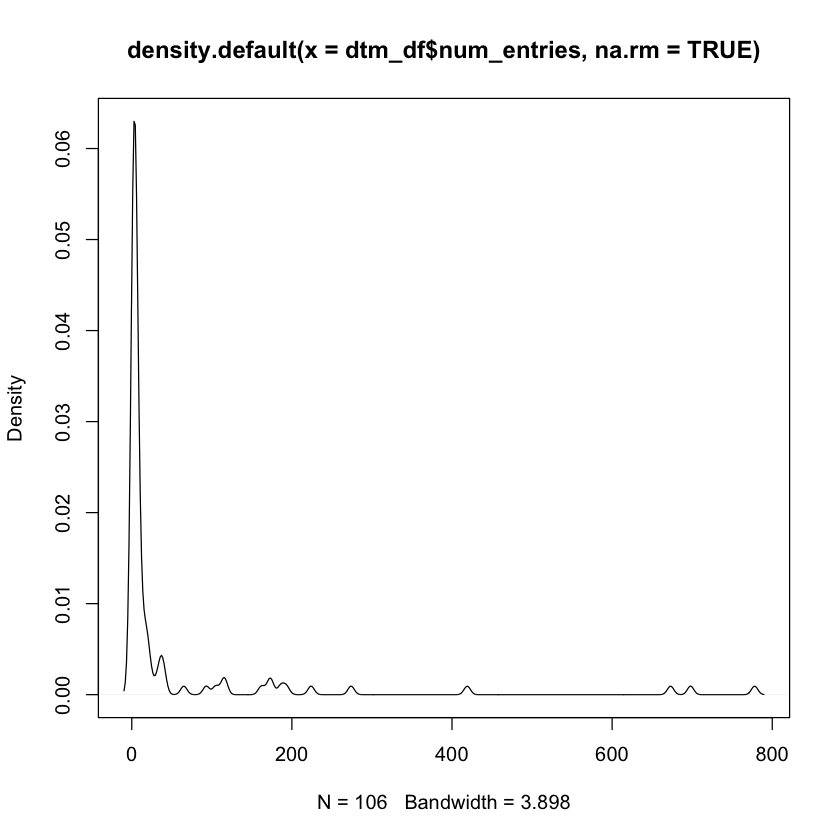

In [6]:
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
dtm_df["num_occurances",] = colSums(dtm_df[1:rows_to_sum,])
dtm_df["num_occurances","num_entries"] = NA 

plot(density(dtm_df$num_entries, na.rm = TRUE))
table(dtm_df$num_entries, useNA = "ifany") #number of documents with each number of entries

print(paste("There are", length(which(dtm_df$num_entries >= 10)), "documents with 10 or more entries."))
print(paste("There are", length(which(dtm_df$num_entries >= 100)), "documents with 100 or more entries."))

num_occurances
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   16   17 
1472  297  184  118   77   49   37   25   17    6    6    3    2    2    2    1 
  19   49  189  212 <NA> 
   1    1    1    1    1 

[1] "76.85% of entries appear only once or twice across the corpus"
[1] "26 entries occur in 10 or more documents"
[1] "including one that occurs 212 times across the 106 documents"
[1] "The most common entry is unknown"


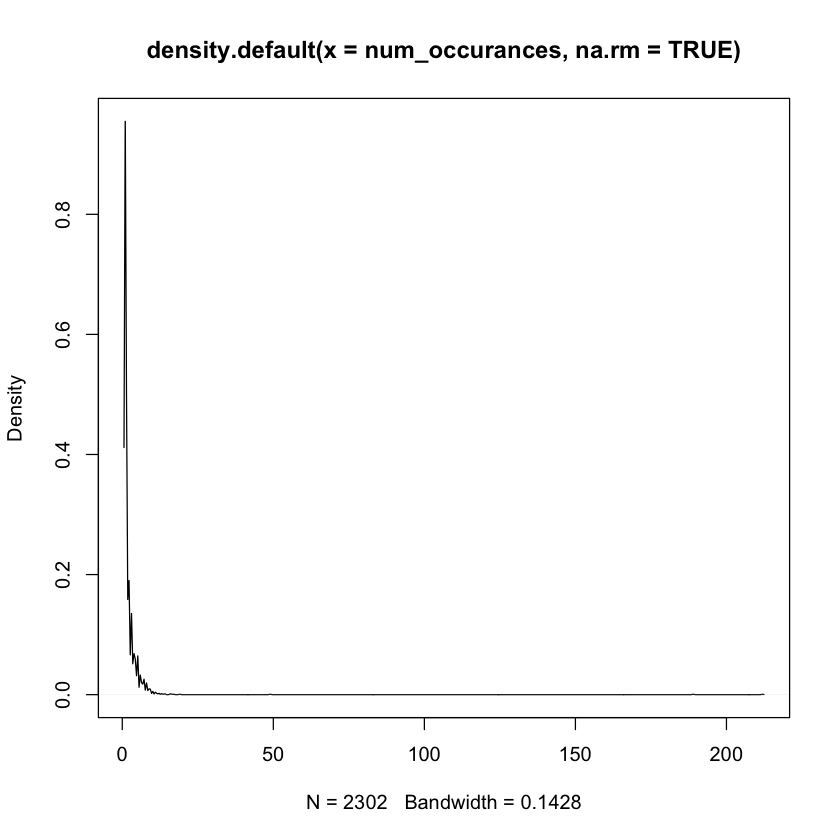

In [7]:
num_occurances = unlist(dtm_df["num_occurances",])
plot(density(num_occurances, na.rm = TRUE))
table(num_occurances, useNA = "ifany")

rare = round(length(which(dtm_df["num_occurances",] <=2))/cols_to_sum*100,2)
common = length(which(dtm_df["num_occurances",] >=10))
most_common = max(dtm_df["num_occurances",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurances",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(common, "entries occur in 10 or more documents"))
print(paste("including one that occurs", most_common, "times across the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

In [8]:
# Look at some of the most common entries
colnames(dtm_df)[which(dtm_df["num_occurances",] >= 10)]

[1] "al.hoe.n"                      "allanum.oak.n"                
 [3] "dilim.spoon.n"                 "e.house.n_gigir.chariot.n"    
 [5] "ellag.ball.n"                  "gigir.chariot.n"              
 [7] "guza.chair.n_x.na.na"          "hašhur.apple.n"               
 [9] "hašhur.apple.n_kur.mountain.n" "kid.da.twig.n"                
[11] "kur.wood.n"                    "madal.pole.n"                 
[13] "peš.fig.n"                     "sugin.rot.n"                  
[15] "unknown"                       "x.x.na.na"                    
[17] "x.na.na"                       "x.na.na_ŋešnimbar.palm.n"     
[19] "X.ŋeš.kal.na.na"               "X.ŋeš.x.x.x.na.na"            
[21] "X.ŋeš.x.x.na.na"               "X.ŋeš.x.na.na"                
[23] "X.ŋeš.x.na.na_apin.plow.n"     "šagkal.tree.n"                
[25] "šedug.tree.n"                  "šenu.tree.n"

In [9]:
#currently "variables" (entries) are sorted alphabetically, would like sorted by frequency
dtm_df = as.matrix((dtm_df > 0) + 0) # Converts to binary presence/absence information
dtm_df = dtm_df[,order(colSums(dtm_df), decreasing = TRUE)]
dtm_df = as.data.frame(dtm_df)

In [10]:
# Need to recaculate number of occurances, as was converted to binary. 
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
dtm_df["num_occurances",] = colSums(dtm_df[1:rows_to_sum,])
dtm_df["num_occurances","num_entries"] = NA 

num_occurances = unlist(dtm_df["num_occurances",])
most_frequent = max(num_occurances, na.rm = TRUE)
most_frequent_entry = colnames(dtm_df[which(dtm_df["num_occurances",] == most_frequent)])

print(paste(table(num_occurances)[1], "entries appear in only one document"))
print(paste("The entry that appears in the most documents is", most_frequent_entry))

table(num_occurances, useNA = "ifany")


[1] "1547 entries appear in only one document"
[1] "The entry that appears in the most documents is unknown"


num_occurances
   1    2    3    4    5    6    7    8    9   10   11   12   21   34 <NA> 
1547  270  169  118   69   56   26   25    8    7    4    1    1    1    1 

In [11]:
# These entries appear in at least 10 different documents.
colnames(dtm_df)[which(dtm_df["num_occurances",] >=10)]

[1] "unknown"                       "X.ŋeš.x.na.na"                
 [3] "al.hoe.n"                      "hašhur.apple.n"               
 [5] "hašhur.apple.n_kur.mountain.n" "peš.fig.n"                    
 [7] "šedug.tree.n"                  "allanum.oak.n"                
 [9] "dilim.spoon.n"                 "e.house.n_gigir.chariot.n"    
[11] "gigir.chariot.n"               "X.ŋeš.x.x.na.na"              
[13] "šagkal.tree.n"                 "šenu.tree.n"

In [12]:
dtm_df$document = row.names(dtm_df) #add document names as row names
dtm_df = dtm_df[-which(row.names(dtm_df) == "num_occurances"),] # remove num_occurances row

In [13]:
melted_dtm_df = melt(dtm_df)
head(melted_dtm_df)

Using document as id variables


document,variable,value
P117395,unknown,0
P117404,unknown,0
P128345,unknown,0
P224980,unknown,0
P224986,unknown,0
P224994,unknown,0


In [14]:
# http://stackoverflow.com/questions/10397183/heat-map-of-binary-data-using-r-or-python

# ggplot(data = melted_dtm_df[150000:160474,], aes(y=document, x=variable, fill=value)) + 
#   geom_tile() +
#   theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 5))

#qplot(data=melted_dtm_df, x=variable,y=document, fill=factor(value),
#    geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
#  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 1), axis.text.y = element_text(size = 3))

# Look at a subset
# qplot(data = melted_dtm_df[1:10000,], x=variable, y=document, fill=factor(value),
#     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
# theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8), axis.text.y = element_text(size = 5))


## Grouping Documents by Entry Similarity  
We can use hierarchical clustering with our presence/absence matrix to uncover groups of similar documents. Ideally, we can benchmark these clusters' accuracy in uncovering geographically or chronologically related documents by looking at metadata, but for this collection the metadata may be too sparse to do that benchmarking.  

In either case, we can establish a workflow for doing hierarchical clustering and apply that to other datasets with better provenance information to test for cluster utility.  

In [15]:
clusters <- hclust(dist(dtm_df))

Warning message in dist(dtm_df):
“NAs introduced by coercion”

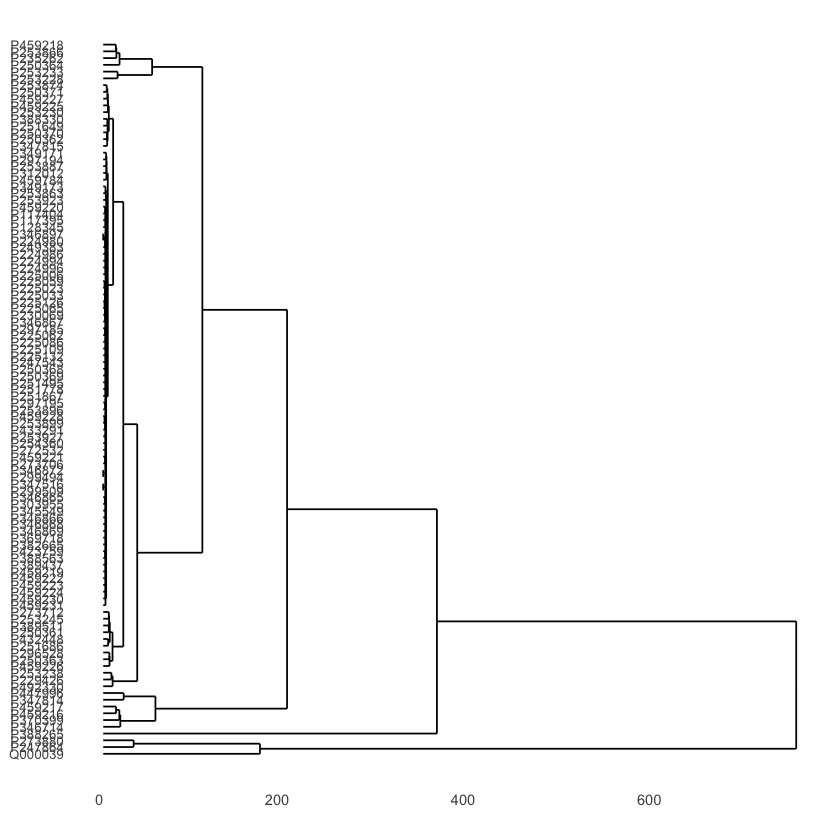

In [16]:
ggdendrogram(clusters, rotate = TRUE) + theme(axis.text.y = element_text(size = 8))

## Adding provenience by using ORACC metadata
The file `data/metadata/dcclt-meta.csv` contains some metadata, including document provenience when known. We read in this data and add provenience to our DTM.

In [17]:
# Bring in metadata
ids = read.csv("../data/metadata/dcclt_meta.csv")
ids$document = ids$X
ids$X = NULL
head(ids)

designation,period,provenience,document
"W 06435,a",Uruk III,Uruk,P000001
"W 06435,b",Uruk III,Uruk,P000002
"W 09123,d",Uruk IV,Uruk,P000003
"W 09169,d",Uruk IV,Uruk,P000004
"W 09206,k",Uruk IV,Uruk,P000005
"W 09656,h1",Uruk IV,Uruk,P000006


In [18]:
# Add provenance information to dtm_df
dtm_df = merge(dtm_df, ids, by = "document")
dtm_df$provenience = droplevels(dtm_df)$provenience
table(dtm_df$provenience)


       Isin        Kish    Nerebtum      Nippur not entered    Šaduppum 
         10           1           1           2           1          12 
  Shaduppum   uncertain          Ur        Uruk 
          1          68           8           2 

[1] 10

 [1] "Isin"        "Kish"        "Nerebtum"    "Nippur"      "not entered"
 [6] "Šaduppum"    "Shaduppum"   "uncertain"   "Ur"          "Uruk"       


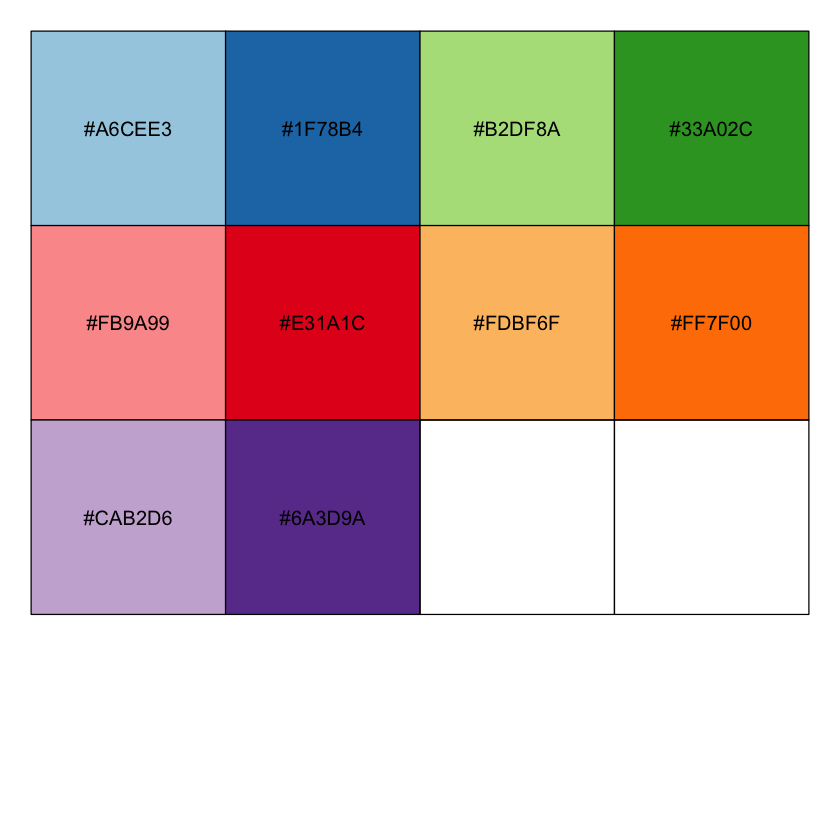

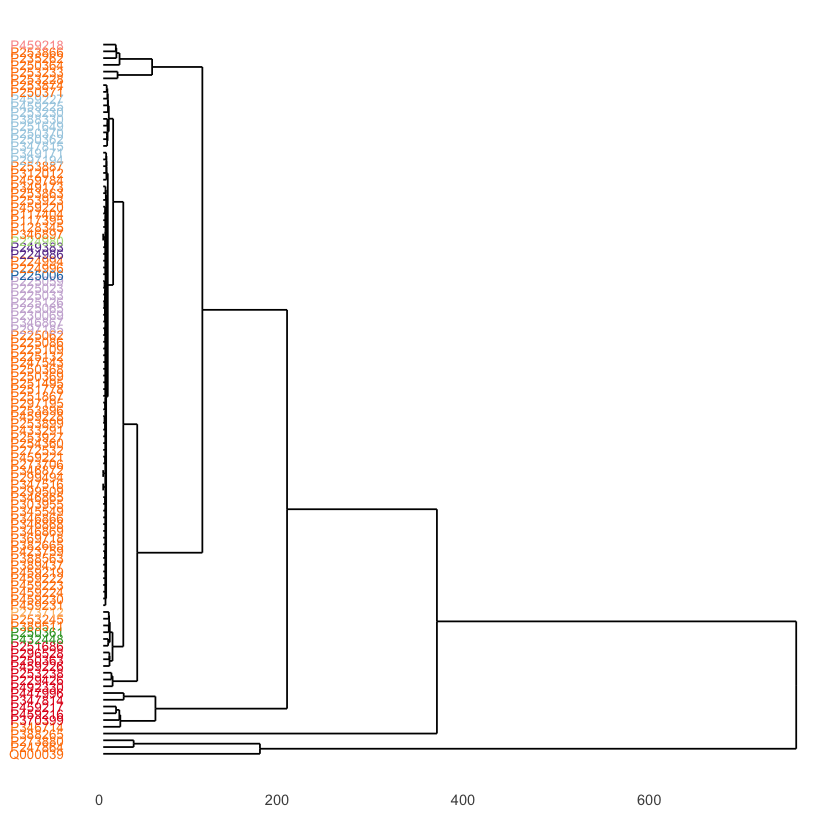

In [19]:
# Add colors to dendrogram by provenance
numColors = length(levels(factor(dtm_df$provenience)))
numColors
myPalette = brewer_pal(palette = "Paired")(numColors)
names(myPalette) = levels(dtm_df$provenience)
print(names(myPalette))
show_col(myPalette)
ggdendrogram(clusters, rotate = TRUE) + 
theme(axis.text.y = element_text(size = 8, color = myPalette[dtm_df$provenience]))